# Dense Network for MNIST

2.0.0
train_images.shape:  (60000, 28, 28)
train_labels.shape:  (60000,)
test_images.shape: (10000, 28, 28)
test_labels.shape: (10000,)


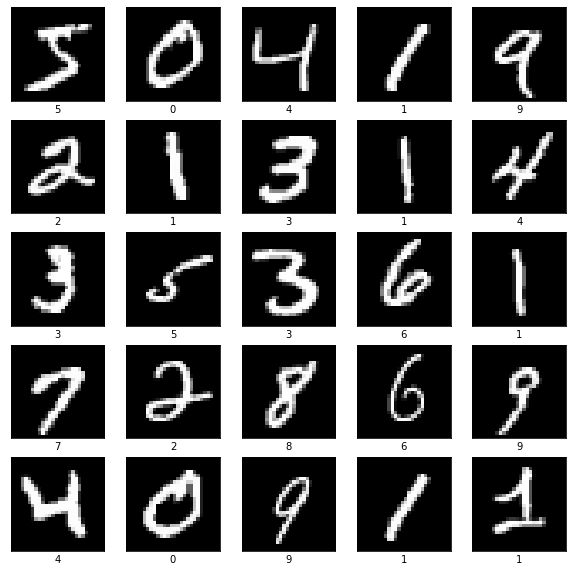

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 396us/sample - loss: 0.2561 - accuracy: 0.9275
Epoch 2/10
60000/60000 [==============================] - 11s 183us/sample - loss: 0.1123 - accuracy: 0.9668- - ETA: 
Epoch 3/10
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0778 - accuracy: 0.9766
Epoch 4/10
60000/

In [3]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print('train_images.shape: ', train_images.shape)
print('train_labels.shape: ', train_labels.shape)
print('test_images.shape:', test_images.shape)
print('test_labels.shape:', test_labels.shape)
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.gray)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model.summary())
model.fit(train_images, train_labels, epochs=10)

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


In [16]:
from __future__ import absolute_import, division, print_function, unicode_literals
%matplotlib inline



import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

batch_size = 128
num_classes = 10
epochs = 12

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

train_images = train_images / 255.0
test_images = test_images / 255.0


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)


2.0.0
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 41s 688us/sample - loss: 0.1436 - accuracy: 0.9558 - val_loss: 0.0470 - val_accuracy: 0.9844
Epoch 2/10
60000/60000 [==============================] - 42s 700us/sample - loss: 0.0449 - accuracy: 0.9862 - val_loss: 0.0334 - val_accuracy: 0.9887
Epoch 3/10
60000/60000 [==============================] - 41s 686us/sample - loss: 0.0336 - accuracy: 0.9891 - val_loss: 0.0321 - val_accuracy: 0.9887
Epoch 4/10
60000/60000 [==============================] - 41s 685us/sample - loss: 0.0259 - accuracy: 0.9917 - val_loss: 0.0324 - val_accuracy: 0.9900
Epoch 5/10
60000/60000 [==============================] - 45s 757us/sample - loss: 0.0194 - accuracy: 0.9937 - val_loss: 0.0336 - val_accuracy: 0.9892
Epoch 6/10
60000/60000 [==============================] - 41s 690us/sample - loss: 0.0161 - accuracy: 0.9947 - val_loss: 0.0351 - val_accuracy: 0.9901
Epoch 7/10
60000/60000 [==============

10000/1 - 2s - loss: 0.0180 - accuracy: 0.9910


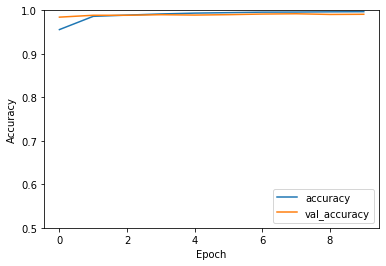

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)